# cadCAD Template: Robot and the Marbles - Part 2

![](images/Overview.jpeg)
![](images/Mech.jpeg)

In [1]:
%%capture
!pip install cadCAD

In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib 
from cadCAD.engine import ExecutionMode, ExecutionContext, Executor
import configBlank
from cadCAD import configs
import matplotlib.pyplot as plt

%matplotlib inline

exec_mode = ExecutionMode()

[{'T': range(0, 10), 'N': 1, 'M': [{}]}]


In [3]:
# Run Cad^2

first_config = configs # only contains config1
single_proc_ctx = ExecutionContext(context=exec_mode.single_proc)
run = Executor(exec_context=single_proc_ctx, configs=first_config)

raw_result, tensor_field = run.execute()
df = pd.DataFrame(raw_result)
df.set_index(['run', 'timestep', 'substep'])


                            __________   ____ 
          ________ __ _____/ ____/   |  / __ \
         / ___/ __` / __  / /   / /| | / / / /
        / /__/ /_/ / /_/ / /___/ ___ |/ /_/ / 
        \___/\__,_/\__,_/\____/_/  |_/_____/  
        by BlockScience
        
Execution Mode: single_proc: [<cadCAD.configuration.Configuration object at 0x0000014180A7E288>]
Configurations: [<cadCAD.configuration.Configuration object at 0x0000014180A7E288>]


box_A  box_B
run timestep substep              
1   0        0           10      0
    1        1            9      1
    2        1            8      2
    3        1            7      3
    4        1            6      4
    5        1            5      5
    6        1            5      5
    7        1            5      5
    8        1            5      5
    9        1            5      5
    10       1            5      5

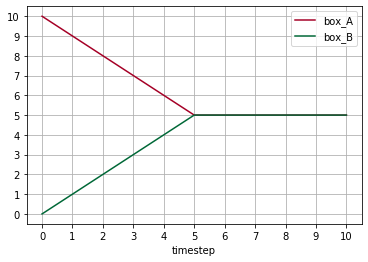

In [4]:
df.plot('timestep', ['box_A', 'box_B'], grid=True, 
        colormap = 'RdYlGn',
        xticks=list(df['timestep'].drop_duplicates()), 
        yticks=list(range(1+(df['box_A']+df['box_B']).max())));

Because we have made it so that both robots read and update the state of the system at the same time, the equilibrium we had before (with 5 marbles in each box) is never reached. Instead, the system oscillates around that point.